# **Week 2: Colab Experiment**

# I. Introduction
This code performs a data analysis and prediction task to estimate the number of subscribers for various entities (such as YouTubers or social media profiles) based on a set of features. The primary goal is to train two different machine learning models—Linear Regression and Ridge Regression—using k-fold cross-validation to evaluate and compare their performance. By leveraging cross-validation, the code ensures that the models are evaluated fairly, with a focus on avoiding overfitting and ensuring generalizability to new data.

# II. Methods












In [1]:
# import the packges
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter
from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Mounted at /content/drive


In [2]:
# load the csv file
# replace the path with your own
df = pd.read_csv("/content/drive/My Drive/week2_colab/Global_YouTube_Statistics_cleaned.csv")
display(df)

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,IN,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,US,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,US,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,US,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,IN,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,Music,99,US,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,BR,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,IN,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,Gaming,39,SE,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [3]:
# Use one-hot encoding to convert the categorical variables to numerical variables
######################## TODO #####################################

# select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

print("Categorical columns: ", categorical_columns)

display(df_encoded)

#####################################################################

Categorical columns:  Index(['Youtuber', 'category', 'Abbreviation'], dtype='object')


,subscribers,video views,uploads,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,...,Abbreviation_SE,Abbreviation_SG,Abbreviation_SV,Abbreviation_TH,Abbreviation_TR,Abbreviation_UA,Abbreviation_US,Abbreviation_VE,Abbreviation_VN,Abbreviation_WS
0,245000000,2.280000e+11,20082,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,...,False,False,False,False,False,False,False,False,False,False
1,170000000,0.000000e+00,1,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,2006.0,...,False,False,False,False,False,False,True,False,False,False
2,166000000,2.836884e+10,741,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,...,False,False,False,False,False,False,True,False,False,False
3,162000000,1.640000e+11,966,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,...,False,False,False,False,False,False,True,False,False,False
4,159000000,1.480000e+11,116536,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,12400000,6.993406e+09,99,171.0,4.941200e+07,12400.0,197600.00,148200.00,2.400000e+06,2012.0,...,False,False,False,False,False,False,True,False,False,False
804,12300000,9.029610e+09,1200,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,2017.0,...,False,False,False,False,False,False,False,False,False,False
805,12300000,1.674410e+09,1500,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,2018.0,...,False,False,False,False,False,False,False,False,False,False
806,12300000,3.741235e+08,39,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,2012.0,...,True,False,False,False,False,False,False,False,False,False


In [4]:
# Define the dependent and independent variables.
Y = df[['subscribers']].values
X = df.loc[:, np.isin(df.columns, ['subscribers', 'Youtuber'])==False].values


In [21]:
# Create CV folds
######################## TODO #####################################
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=101)
splits = list(kf.split(df_encoded))
#####################################################################

In [22]:

# Train models and apply them to the test set

Y_est_linear = np.full([len(Y),1], np.nan)
Y_est_ridge = np.full([len(Y),1], np.nan)
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

# training steps
for fold_id in range(num_folds):
  ######################## TODO #####################################
  # X_train. Y_train for training
  # X_test, Y_test for predict
  # retrieve the training and test indices from the splits list
  train_index, test_index = splits[fold_id]
  X_train, X_test = df_encoded.iloc[train_index].drop(columns=['subscribers']), df_encoded.iloc[test_index].drop(columns=['subscribers'])
  Y_train, Y_test = df_encoded.iloc[train_index]['subscribers'], df_encoded.iloc[test_index]['subscribers']



  #####################################################################

  # Linear regression
  ######################## TODO #####################################
  linear_model.fit(X_train, Y_train)
  Y_pred_linear = linear_model.predict(X_test)
  Y_est_linear[test_index] = Y_pred_linear.reshape(-1, 1)
  #####################################################################

  # Ridge regression
  ######################## TODO #####################################
  ridge_model.fit(X_train, Y_train)
  Y_pred_ridge = ridge_model.predict(X_test)
  Y_est_ridge[test_index] = Y_pred_ridge.reshape(-1, 1)
  #####################################################################

df['Estimated_subscribers_linear'] = Y_est_linear
df['Estimated_subscribers_ridge'] = Y_est_ridge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


## III. Results

Post hoc analysis to examine the correlation and RMSE between the true number of subscribers and the predicted number of subscribers.

In [23]:
def plot_function(df, x_variable, y_variable):
  plt.figure(figsize = (5,5) , dpi=150)
  sns.scatterplot(data=df, x=x_variable, y=y_variable)
  corr = round(pearsonr(df[x_variable], df[y_variable])[0],3)
  rmse = round(mean_squared_error(df[x_variable], df[y_variable], squared=False),3)
  plt.title(f"corr = {corr} \n RMSE={rmse}")
  plt.show()

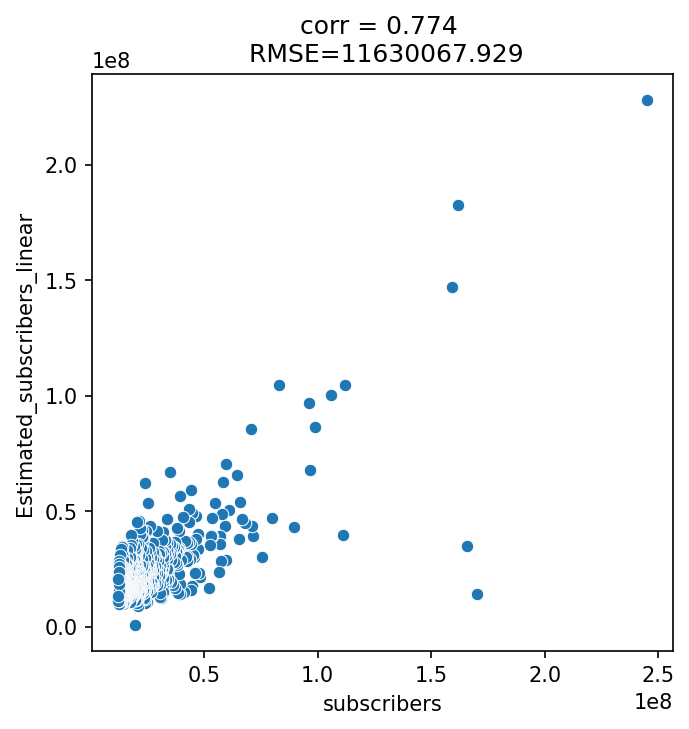

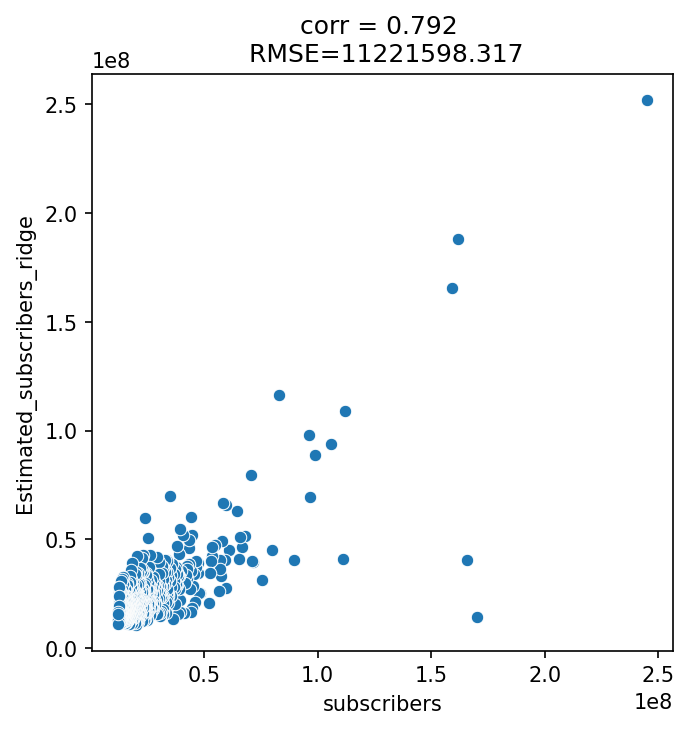

In [24]:
plot_function(df, "subscribers", "Estimated_subscribers_linear")
plot_function(df, "subscribers", "Estimated_subscribers_ridge")

# IV. Conclusion and Discussion



**Linear Regression:**
- Correlation: 0.774
- RMSE: 11,630,067.929

**Ridge Regression:**
- Correlation: 0.792
- RMSE: 11,221,598.317

### Discussion:
Both models produced similar correlation values, indicating that they effectively capture the relationship between the input features and the target variable. Ridge Regression had a slightly higher correlation, hinting at a marginal improvement in prediction accuracy over Linear Regression. Linear Regression exhibited a higher RMSE, meaning that the average error in these predictions was larger.

### Conclusion:
Both models effectively predict the number of YouTube subscribers based on the provided features. Ridge Regression, with its regularization, likely produced more stable and generalizable outcomes than Linear Regression. These models could be useful for estimating subscriber growth for new or existing YouTubers based on their characteristics or for predicting subscriber trends over time. While the results are promising, further refinement and exploration of other modeling techniques could yield better predictions.